In [1]:
!pip install ultralytics roboflow opencv-python matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 M

In [2]:
from ultralytics import YOLO
from roboflow import Roboflow
import os
import random
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
rf = Roboflow(api_key="pER3aqrQBR1p9puNyRNF")
project = rf.workspace("manoj-wcmgk").project("animals-dataset-icres")
version = project.version(5)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Animals-Dataset-5 in yolov8:: 100%|██████████| 35946/35946 [00:04<00:00, 8051.38it/s] 


In [4]:
train_img_dir = os.path.join(dataset.location, "train", "images")
val_img_dir = os.path.join(dataset.location, "valid", "images")
test_img_dir = os.path.join(dataset.location, "test", "images")

train_images = os.listdir(train_img_dir)
val_images = os.listdir(val_img_dir)
test_images = os.listdir(test_img_dir)

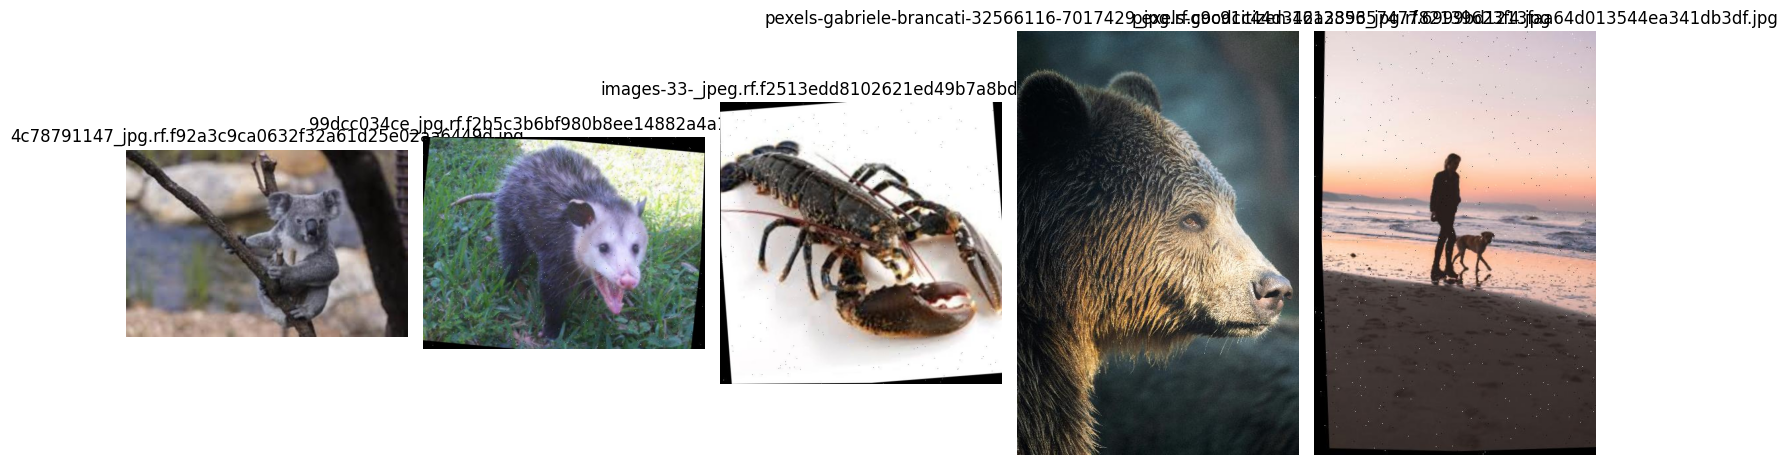

In [5]:
sample_imgs = random.sample(train_images, 5)

plt.figure(figsize=(15, 8))
for i, file in enumerate(sample_imgs):
    img_path = os.path.join(train_img_dir, file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(file)
plt.tight_layout()
plt.show()

In [6]:
print(f"Train set images : {len(train_images)}")
print(f"Validation images: {len(val_images)}")
print(f"Test set images  : {len(test_images)}")

Train set images : 16995
Validation images: 483
Test set images  : 489


In [7]:
model = YOLO("yolov8x.pt")

model.train(
    data=os.path.join(dataset.location, "data.yaml"),
    epochs=30,
    imgsz=640,   
    batch=16,      
    name="yolov8x_animals",
    patience=10,
    workers=2,
    verbose=True
)

100%|██████████| 131M/131M [00:00<00:00, 183MB/s]


Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/Animals-Dataset-5/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8x.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8x_animals, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=Tru

100%|██████████| 755k/755k [00:00<00:00, 17.8MB/s]


Overriding model.yaml nc=80 with nc=88

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 74.6MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 974.7±425.0 MB/s, size: 42.4 KB)


train: Scanning /kaggle/working/Animals-Dataset-5/train/labels... 16995 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16995/16995 [00:11<00:00, 1440.54it/s]


train: New cache created: /kaggle/working/Animals-Dataset-5/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 534.9±274.9 MB/s, size: 32.7 KB)


val: Scanning /kaggle/working/Animals-Dataset-5/valid/labels... 483 images, 0 backgrounds, 0 corrupt: 100%|██████████| 483/483 [00:00<00:00, 1342.86it/s]

val: New cache created: /kaggle/working/Animals-Dataset-5/valid/labels.cache


Plotting labels to runs/detect/yolov8x_animals/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000109, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8x_animals
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      11.8G     0.9394      2.862      1.374         11        640: 100%|██████████| 1063/1063 [23:32<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.28it/s]


                   all        483        650      0.458      0.555      0.522      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      12.5G     0.9284      1.917      1.328          8        640: 100%|██████████| 1063/1063 [23:29<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.36it/s]

                   all        483        650      0.548      0.564      0.597      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      12.6G     0.9385      1.748      1.327          8        640: 100%|██████████| 1063/1063 [23:24<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.37it/s]

                   all        483        650      0.645      0.554      0.663      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      12.5G     0.9236      1.583      1.314          4        640: 100%|██████████| 1063/1063 [23:23<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.37it/s]

                   all        483        650      0.672      0.594      0.693      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      12.3G      0.881      1.372       1.28          6        640: 100%|██████████| 1063/1063 [23:23<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.37it/s]

                   all        483        650      0.677      0.691      0.733      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      12.2G     0.8541      1.252      1.261         12        640: 100%|██████████| 1063/1063 [23:23<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.37it/s]

                   all        483        650      0.701      0.711      0.774      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      12.5G      0.825      1.118      1.236         12        640: 100%|██████████| 1063/1063 [23:23<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.37it/s]

                   all        483        650      0.698      0.765      0.802       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      12.5G     0.7987      1.032      1.216         15        640: 100%|██████████| 1063/1063 [23:22<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.37it/s]

                   all        483        650      0.785      0.754      0.833      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      12.3G     0.7804     0.9579        1.2          9        640: 100%|██████████| 1063/1063 [23:23<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.37it/s]

                   all        483        650      0.813      0.774      0.847      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      12.2G      0.762     0.9005       1.19          9        640: 100%|██████████| 1063/1063 [23:23<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.37it/s]

                   all        483        650      0.789      0.769      0.847       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      12.5G     0.7341      0.828      1.169         10        640: 100%|██████████| 1063/1063 [23:23<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.38it/s]

                   all        483        650      0.825      0.761      0.845      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      12.6G     0.7288     0.8034      1.168          8        640: 100%|██████████| 1063/1063 [23:23<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.37it/s]

                   all        483        650      0.818      0.775      0.863      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      12.2G     0.7049     0.7522       1.15          8        640: 100%|██████████| 1063/1063 [23:24<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.38it/s]

                   all        483        650      0.875      0.738      0.863       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      12.2G     0.6925      0.719      1.142          8        640: 100%|██████████| 1063/1063 [23:22<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.38it/s]

                   all        483        650      0.876      0.761       0.88      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      12.2G     0.6779     0.6954      1.134          8        640: 100%|██████████| 1063/1063 [23:22<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.38it/s]

                   all        483        650      0.833      0.801      0.872       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      12.5G     0.6603     0.6584      1.121          9        640: 100%|██████████| 1063/1063 [23:21<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.38it/s]

                   all        483        650      0.885       0.77      0.882      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      12.3G     0.6488      0.637      1.119          7        640: 100%|██████████| 1063/1063 [23:24<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.37it/s]

                   all        483        650      0.864      0.799      0.886      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      12.2G     0.6338     0.5992      1.103         13        640: 100%|██████████| 1063/1063 [23:22<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.37it/s]

                   all        483        650      0.874      0.766      0.874      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      12.5G     0.6179     0.5757      1.094         10        640: 100%|██████████| 1063/1063 [23:24<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.37it/s]

                   all        483        650      0.874      0.769      0.886      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      12.5G      0.605     0.5588      1.087         11        640: 100%|██████████| 1063/1063 [23:24<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.37it/s]

                   all        483        650      0.869      0.803      0.888      0.741


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      12.3G      0.465     0.2825          1          4        640: 100%|██████████| 1063/1063 [23:10<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.37it/s]

                   all        483        650       0.89      0.744      0.875      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      12.2G     0.4465     0.2601     0.9859          3        640: 100%|██████████| 1063/1063 [23:09<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.37it/s]

                   all        483        650      0.893      0.769       0.88      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      12.5G     0.4294     0.2472     0.9732          3        640: 100%|██████████| 1063/1063 [23:08<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.36it/s]

                   all        483        650      0.874      0.775      0.876      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      12.5G     0.4129     0.2283      0.962          5        640: 100%|██████████| 1063/1063 [23:09<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.36it/s]

                   all        483        650      0.846      0.799      0.883      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      12.3G     0.3956     0.2189      0.949          8        640: 100%|██████████| 1063/1063 [23:08<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.37it/s]

                   all        483        650      0.881      0.765      0.875       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      12.2G     0.3819     0.2063     0.9399          3        640: 100%|██████████| 1063/1063 [23:08<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.37it/s]

                   all        483        650      0.862      0.787      0.879      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      12.2G     0.3686     0.1963     0.9311          3        640: 100%|██████████| 1063/1063 [23:08<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.37it/s]

                   all        483        650      0.886      0.773      0.885      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      12.5G     0.3511     0.1857     0.9206          4        640: 100%|██████████| 1063/1063 [23:08<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.37it/s]

                   all        483        650      0.884      0.759      0.878      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      12.3G     0.3404      0.178     0.9103          4        640: 100%|██████████| 1063/1063 [23:10<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.37it/s]

                   all        483        650      0.866      0.767      0.879      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      12.2G     0.3296     0.1713     0.9056          3        640: 100%|██████████| 1063/1063 [23:10<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.37it/s]

                   all        483        650      0.877      0.768      0.881      0.748



30 epochs completed in 11.781 hours.
Optimizer stripped from runs/detect/yolov8x_animals/weights/last.pt, 136.9MB
Optimizer stripped from runs/detect/yolov8x_animals/weights/best.pt, 136.9MB

Validating runs/detect/yolov8x_animals/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,208,312 parameters, 0 gradients, 257.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.30it/s]
invalid value encountered in less
invalid value encountered in less


                   all        483        650       0.87      0.773      0.881      0.748
              Antelope          5         10      0.895        0.6      0.705      0.622
                Badger          6          6      0.972      0.833      0.849        0.7
                   Bat          7          8      0.966      0.875      0.935      0.719
                  Bear          5          5       0.85          1      0.995      0.715
                   Bee          5          5          1      0.861      0.995      0.669
                Beetle          2          2      0.848        0.5      0.828      0.702
                 Bison         10         20          1      0.675       0.93      0.845
                  Boar          7          8          1      0.732      0.801       0.64
             Butterfly          9         10      0.995        0.8      0.892      0.793
                   Cat          6          6      0.911      0.833      0.942      0.842
           Caterpille

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
       80, 81, 82, 83, 84, 85, 86, 87])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79cb03d9ce10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0

In [8]:
model = YOLO("/kaggle/working/runs/detect/yolov8x_animals/weights/best.pt")
results = model.val()
cm = results.confusion_matrix.matrix
labels = list(model.names.values())

Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,208,312 parameters, 0 gradients, 257.9 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1024.8±161.8 MB/s, size: 27.8 KB)


val: Scanning /kaggle/working/Animals-Dataset-5/valid/labels.cache... 483 images, 0 backgrounds, 0 corrupt: 100%|██████████| 483/483 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:27<00:00,  1.14it/s]
invalid value encountered in less
invalid value encountered in less


                   all        483        650      0.866      0.773      0.881      0.746
              Antelope          5         10          1      0.594      0.722      0.609
                Badger          6          6      0.969      0.833      0.849      0.716
                   Bat          7          8      0.964      0.875      0.935      0.719
                  Bear          5          5      0.833          1      0.995       0.69
                   Bee          5          5          1      0.864      0.995      0.669
                Beetle          2          2       0.84        0.5      0.828      0.702
                 Bison         10         20          1      0.676      0.957      0.864
                  Boar          7          8          1      0.736      0.801       0.64
             Butterfly          9         10      0.992        0.8      0.892      0.793
                   Cat          6          6      0.836      0.833      0.922      0.833
           Caterpille

In [9]:
import pandas as pd
true_classes, pred_classes = [], []
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        n = int(cm[i, j])
        true_classes.extend([i] * n)
        pred_classes.extend([j] * n)

report_dict = classification_report(
    true_classes,
    pred_classes,
    zero_division=0,
    output_dict=True
)

overall_accuracy = report_dict["accuracy"]
macro_avg        = report_dict["macro avg"]
weighted_avg     = report_dict["weighted avg"]

summary_df = pd.DataFrame({
    "metric"       : ["precision", "recall", "f1-score", "accuracy"],
    "macro_avg"    : [macro_avg["precision"], macro_avg["recall"], macro_avg["f1-score"], overall_accuracy],
    "weighted_avg" : [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], overall_accuracy]
}).round(2)

print("\nOverall Classification Report (macro & weighted averages):\n")
print(summary_df.to_string(index=False))


Overall Classification Report (macro & weighted averages):

   metric  macro_avg  weighted_avg
precision       0.78          0.72
   recall       0.80          0.72
 f1-score       0.77          0.71
 accuracy       0.72          0.72


In [10]:
# Calculate overall accuracy
accuracy = np.trace(cm) / np.sum(cm)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 71.59%


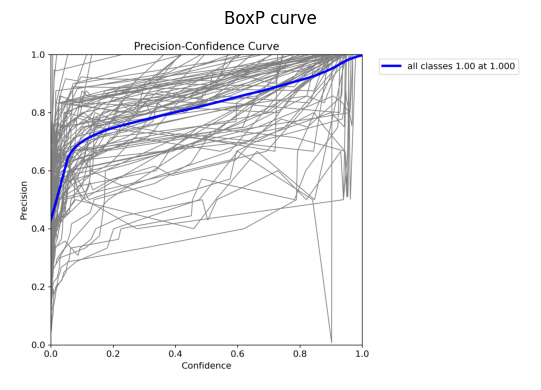

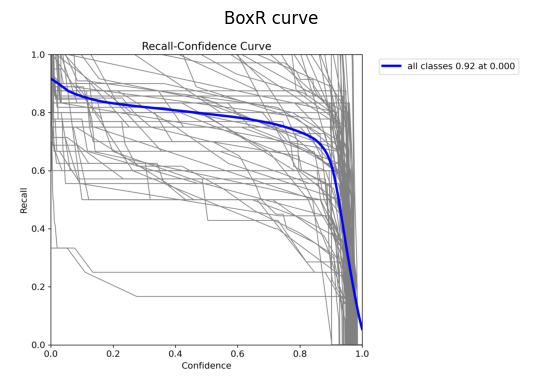

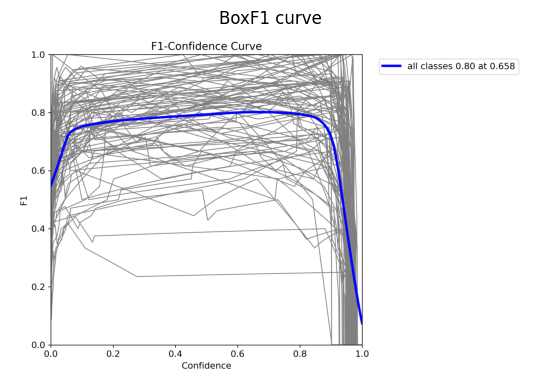

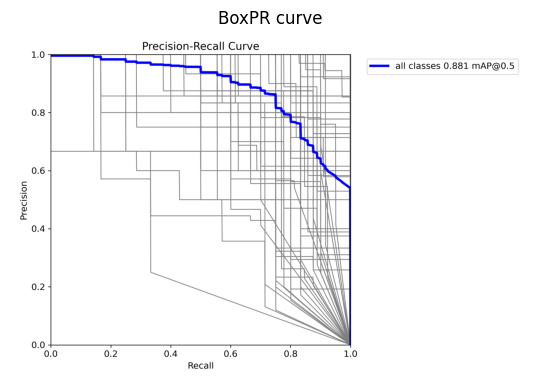

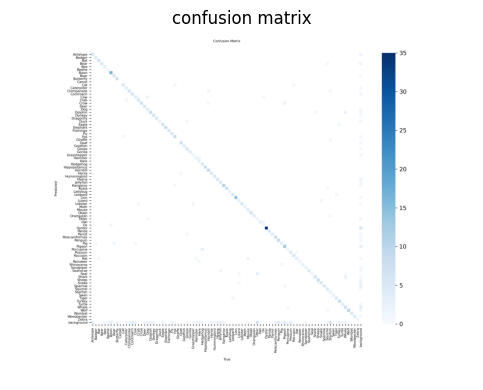

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path

plot_dir = Path("/kaggle/working/runs/detect/yolov8x_animals")
figs = ["BoxP_curve.png", "BoxR_curve.png", "BoxF1_curve.png", "BoxPR_curve.png", "confusion_matrix.png"]

for f in figs:
    plt.figure(figsize=(6, 4))
    plt.imshow(mpimg.imread(plot_dir / f))
    plt.axis("off")
    plt.title(f.replace("_", " ").replace(".png", ""))
    plt.tight_layout()
    plt.show()


image 1/1 /kaggle/working/Animals-Dataset-5/test/images/3d6897e986_jpg.rf.9d644766da8435df24cd97738700f0ff.jpg: 480x640 1 Duck, 77.3ms
Speed: 1.4ms preprocess, 77.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /kaggle/working/Animals-Dataset-5/test/images/9e81bc5555_jpg.rf.8a4c61e54d7da01e6249f202a304a1fd.jpg: 640x640 (no detections), 70.2ms
Speed: 1.5ms preprocess, 70.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/working/Animals-Dataset-5/test/images/0ff4ce0465_jpg.rf.13ad757351a8b520ed562956f0bec785.jpg: 544x640 1 Okapi, 66.1ms
Speed: 1.5ms preprocess, 66.1ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /kaggle/working/Animals-Dataset-5/test/images/0620a3f419_jpg.rf.ad6fda90df49f3b61b5f66b1af1e0675.jpg: 448x640 1 Turkey, 46.3ms
Speed: 1.2ms preprocess, 46.3ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /kaggle/working/Animals-Dataset-5/test/images

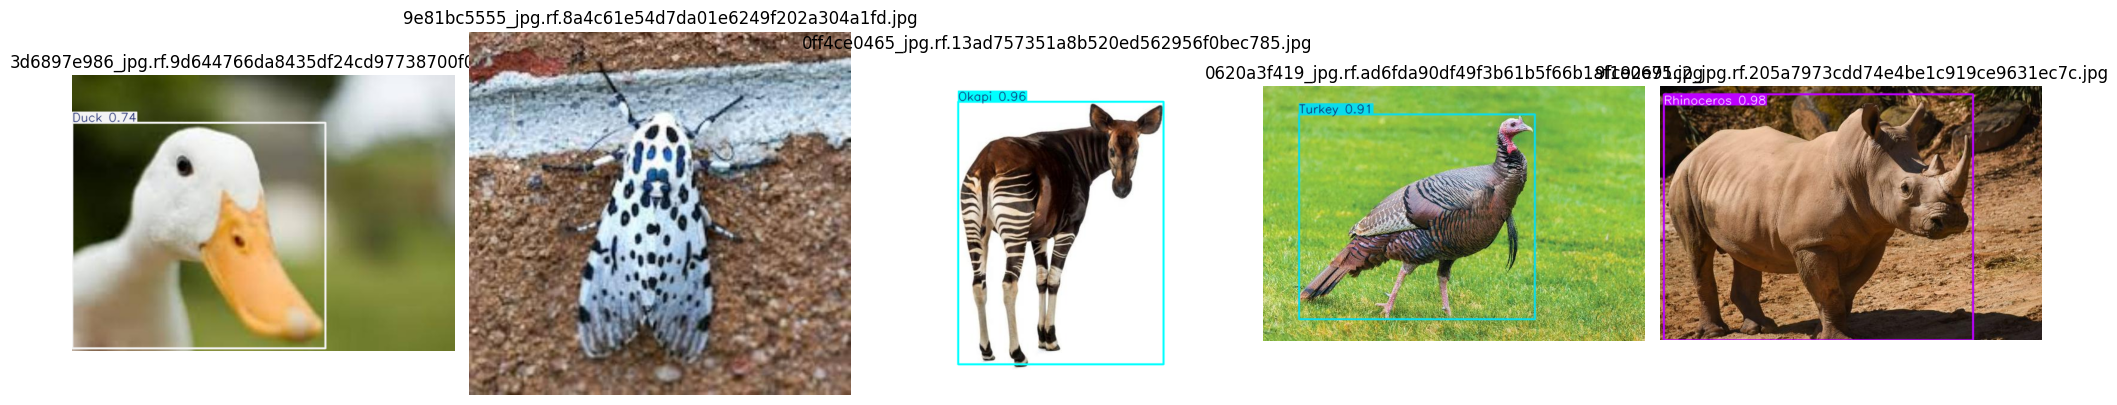

In [12]:
sample_test_imgs = random.sample(test_images, 5)

plt.figure(figsize=(20, 10))
for idx, img_file in enumerate(sample_test_imgs):
    img_path = os.path.join(test_img_dir, img_file)
    
    # Predict
    results = model(img_path)
    result_img = results[0].plot()
    result_img = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

    plt.subplot(1, 5, idx+1)
    plt.imshow(result_img)
    plt.axis('off')
    plt.title(img_file)

plt.tight_layout()
plt.show()